In [3]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
df=pd.read_csv("diamond.csv")

In [4]:
y=df['price']

In [5]:
X = df.drop(columns=['price'],axis=1)

In [6]:
cut_categories = ['Fair', 'Good', 'Very Good','Excellent','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J','K','L','M']
clarity_categories = ['I3','I2','I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']
symmetry_categories = ['Poor','Fair', 'Good', 'Very Good','Excellent']
polish_categories = ['Poor','Fair', 'Good', 'Very Good','Excellent']

In [7]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
or_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    [
        ("OrdinalEncoder", or_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [8]:
X = preprocessor.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((175762, 12), (43941, 12))

In [10]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [12]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Existing models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Elasticnet": ElasticNet(),
    "Decisiontreeregressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42),
   # "Support Vector Regressor (SVR)": SVR(),
}

# Lists to store results
model_list = []
r2_list = []

# Loop through all models
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test datasets
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('=' * 35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 15994.4610
- Mean Absolute Error: 4415.7425
- R2 Score: 0.6053
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 18178.2418
- Mean Absolute Error: 4502.4823
- R2 Score: 0.5746


Lasso
Model performance for Training set
- Root Mean Squared Error: 15994.4616
- Mean Absolute Error: 4415.5084
- R2 Score: 0.6053
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 18178.5470
- Mean Absolute Error: 4502.2455
- R2 Score: 0.5746


Ridge
Model performance for Training set
- Root Mean Squared Error: 15994.4610
- Mean Absolute Error: 4415.7198
- R2 Score: 0.6053
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 18178.2667
- Mean Absolute Error: 4502.4604
- R2 Score: 0.5746


Elasticnet
Model performance for Training set
- Root Mean Squared Error: 18060.7055
- Mean Absolute Error: 4665.4581
- R2

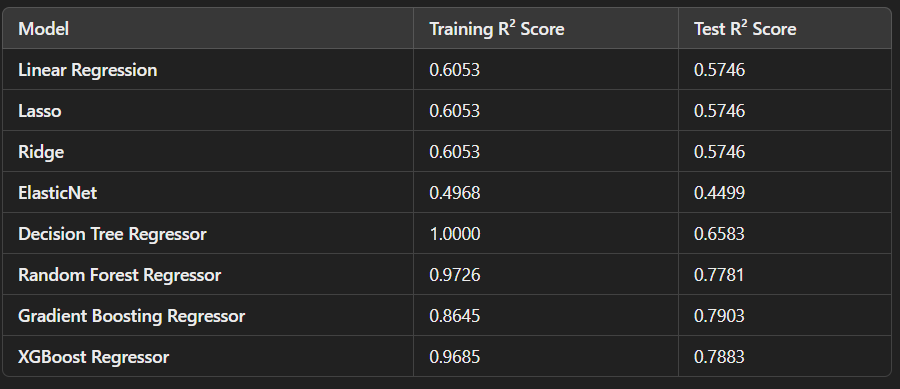